In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


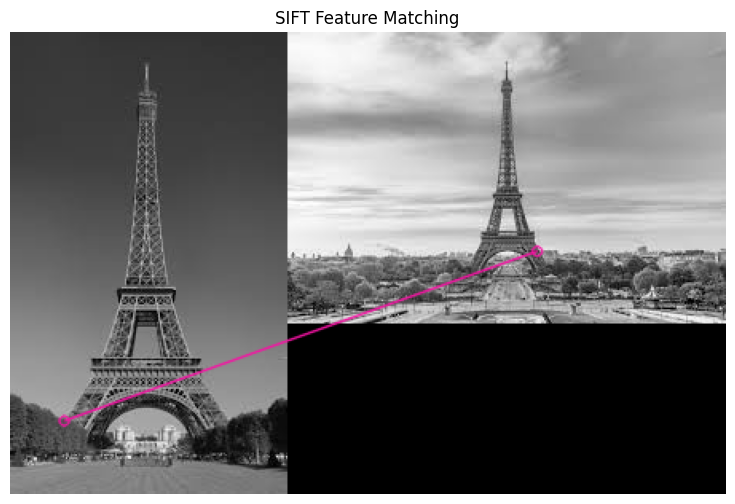

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images in grayscale
img1 = cv2.imread('download.jpeg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('images (2).jpeg', cv2.IMREAD_GRAYSCALE)

# Optional: check if images loaded correctly
if img1 is None or img2 is None:
    print("Error loading images. Check filenames and paths.")
    exit()

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Match descriptors using FLANN-based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

# Apply Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw good matches
result = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)

# Show result using matplotlib
plt.figure(figsize=(12, 6))
plt.title("SIFT Feature Matching")
plt.imshow(result)
plt.axis('off')
plt.show()